In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
import sys
import os
sys.path.append(os.path.abspath('/content/drive/MyDrive/02 Research/01 Affective Computing/03 Benchmark/'))
try:
    import neurokit2
except ImportError as e:
    !pip install neurokit2

try:
    import pyedflib
except ImportError as e:
    !pip install pyedflib

try:
    import tpot
except ImportError as e:
    !pip install tpot

try:
    import tsai
except ImportError as e:
    !pip install tsai


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.0/292.0 KB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 77.5 MB/s eta 0:00:00


# Hyperparameters

In [3]:
num_classes = 2
modality_included = ['ECG','GSR','EMG']
window_length = 10

# Dataset

In [9]:
from pyAffeCT.datasets import WESAD, BioVidEmo, BioVid

# constructing a dataset instance
dataset = WESAD('/content/drive/MyDrive/02 Research/01 Affective Computing/03 Benchmark/pyAffeCT/data/02 WESAD/WESAD')
#dataset = BioVidEmo('/content/drive/MyDrive/02 Research/01 Affective Computing/03 Benchmark/pyAffeCT/data/04 BioVidEmo/bio_raw')
#dataset = BioVid('/content/drive/MyDrive/02 Research/01 Affective Computing/03 Benchmark/pyAffeCT/data/03 BioVid')


# view the subject id list
subject_list = dataset.subject_list



# Traditional Machine Learning

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Mar  3 19:05:30 2023

@author: rjfan
"""

from pyAffeCT.models import traditionalClassifier
from pyAffeCT.metrics import classificationEvaluator





# prepare for the dataframe, set number of classess to be 3
df_train, df_test = dataset.prepare_dataframe(subject_included=subject_list, split_by_subject=True, modality_included=modality_included, num_classes=2)
df_train.head()

X_train = df_train.loc[:,df_train.columns!='Label']
y_train = df_train['Label']
X_test = df_test.loc[:,df_test.columns!='Label']
y_test = df_test['Label']

# instantiate tranditional classifier
clf = traditionalClassifier()

# fit to the training set, tuning to the best hyperparameters
clf.tune_hyperparams(X_train,y_train)

# predict to classess and probabilities
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

# instantiate evaluator and evaluate results
evaluator = classificationEvaluator()
results = evaluator.evaluate(y_test, y_prob=y_prob, plot_roc=False)
print(results)


100%|██████████| 87/87 [18:05<00:00, 12.48s/it]


                SVM       GNB       BNB       MNB        DT        RF  \
accuracy   0.603529  0.607059  0.518824  0.621176  0.540000  0.598824   
precision  0.607843  0.654237  0.516461  0.658462  0.543814  0.605528   
recall     0.583529  0.454118  0.590588  0.503529  0.496471  0.567059   
f1         0.595438  0.536111  0.551043  0.570667  0.519065  0.585662   
roc_auc    0.641957  0.626655  0.521683  0.636988  0.547745  0.631258   
pr_auc     0.653782  0.630934  0.517242  0.648803  0.546743  0.660284   

                KNN  Extra Tree   Bagging  AdaBoost   XGBoost  
accuracy   0.584706    0.610588  0.585882  0.572941  0.611765  
precision  0.582569    0.616337  0.612308  0.569196  0.617284  
recall     0.597647    0.585882  0.468235  0.600000  0.588235  
f1         0.590012    0.600724  0.530667  0.584192  0.602410  
roc_auc    0.609694    0.667255  0.623122  0.622455  0.664174  
pr_auc     0.607556    0.691712  0.635561  0.635901  0.680944  


# Deep Learning

## Dataset reading

In [7]:
from tsai.all import *

In [23]:

# prepare for the dataframe, set number of classess to be 3
df_train, df_test = dataset.prepare_flatten_dataframe(subject_included=subject_list, split_by_subject=True, modality_included = modality_included, window_length=window_length,num_classes=num_classes)

train_loader, test_loader, input_shape = dataset.df_to_dataloader(df_train,df_test,num_classes, batch_size = 4)

100%|██████████| 15/15 [07:31<00:00, 30.08s/it]


In [32]:
df_train.loc[:,df_train.columns!='Label']

,0,1,2,3,4,5,6,7,8,9,...,20990,20991,20992,20993,20994,20995,20996,20997,20998,20999
0,-0.210892,-0.190750,-0.177933,-0.173538,-0.172348,-0.175186,-0.178299,-0.180130,-0.180862,-0.179810,...,-0.019226,-0.020462,-0.014694,-0.020462,-0.004578,0.001373,0.010483,-0.005814,0.001556,0.004349
1,0.015244,0.011581,0.008743,0.003983,-0.000366,-0.005722,-0.009338,-0.012085,-0.014969,-0.017624,...,-0.017899,0.052322,0.088531,0.036804,-0.006821,-0.024216,0.009018,0.026321,-0.000046,0.009705
2,-0.044495,-0.041748,-0.042984,-0.048569,-0.049255,-0.044632,-0.042709,-0.040970,-0.040970,-0.037125,...,-0.001419,-0.002472,0.010941,-0.005905,0.007370,0.016022,0.002518,0.000320,-0.003433,-0.013596
3,-0.055847,-0.055252,-0.055069,-0.054886,-0.056625,-0.057175,-0.057816,-0.056900,-0.056580,-0.055710,...,-0.019638,-0.012268,-0.019592,0.001419,0.012726,0.001190,-0.005219,-0.017258,-0.030441,-0.020279
4,-0.183243,-0.178162,-0.177933,-0.177658,-0.174637,-0.169739,-0.168915,-0.170425,-0.170059,-0.169510,...,0.004303,-0.018173,-0.023209,-0.025223,-0.014145,-0.019272,-0.011032,0.002060,0.017899,0.029617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,0.142090,0.153168,0.164612,0.164932,0.154129,0.138107,0.121445,0.101028,0.080154,0.056625,...,-0.009705,-0.012497,-0.003433,-0.007095,0.005402,0.014694,0.013412,0.006546,0.014053,-0.001236
1340,-0.490860,-0.467056,-0.450211,-0.443253,-0.440964,-0.434875,-0.436844,-0.442062,-0.446915,-0.446548,...,-0.004669,0.002701,-0.012405,0.005997,-0.007187,-0.006912,-0.001968,-0.005997,-0.004715,-0.021881
1341,-0.162918,-0.157654,-0.158249,-0.160812,-0.154129,-0.145432,-0.142639,-0.142639,-0.140305,-0.134537,...,0.004623,0.013687,-0.001602,0.006088,-0.006409,-0.010666,-0.018723,-0.012772,0.003387,-0.004211
1342,0.028610,0.036667,0.051682,0.065735,0.081619,0.092239,0.095810,0.096497,0.095398,0.094528,...,-0.013687,0.000778,-0.005310,-0.007004,-0.007874,-0.001556,-0.004715,-0.004440,-0.000137,-0.003342


# Model

In [33]:
X_train = np.array(df_train.loc[:,df_train.columns!='Label'])
X_test = np.array(df_test.loc[:,df_test.columns!='Label'])

X_train = X_train.reshape(X_train.shape[0], len(modality_included) , X_train.shape[1]//len(modality_included))
y_train = df_train['Label']
X_test = X_test.reshape(X_test.shape[0], len(modality_included) , X_test.shape[1]//len(modality_included))
y_test = df_test['Label']

X, y, splits = combine_split_data([X_train, X_test], [y_train, y_test])

tfms  = [None, [Categorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True)

In [34]:
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=[64, 128], batch_tfms=[TSStandardize()], num_workers=0)

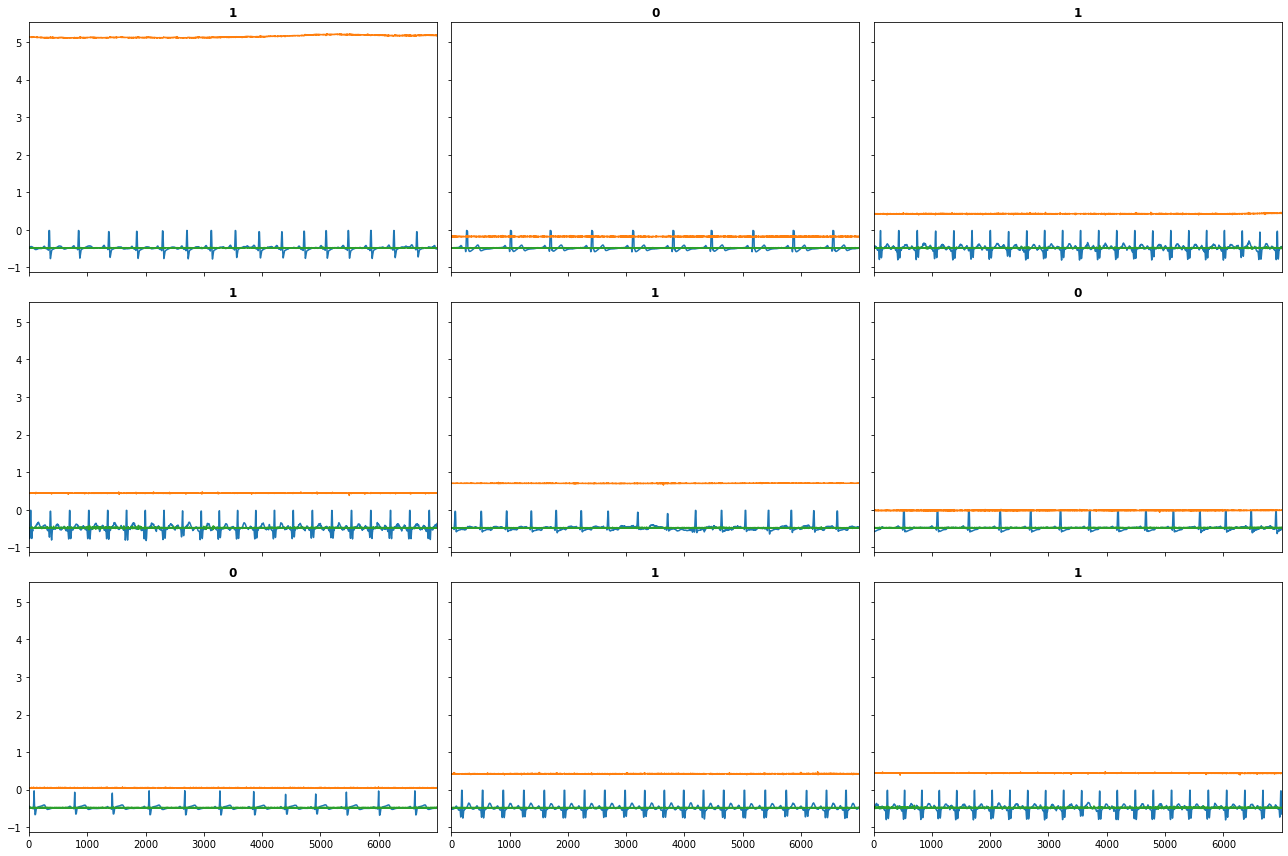

In [35]:
dls.show_batch(sharey=True)

SuggestedLRs(valley=0.0006918309954926372)

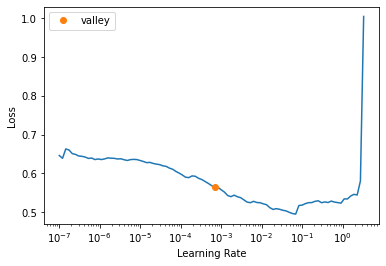

In [38]:
model = ResNet(dls.vars, dls.c)
learn = Learner(dls, model, metrics=accuracy)
learn.save('stage0')
learn.load('stage0')
learn.lr_find()

In [39]:
learn.fit_one_cycle(25, lr_max=1e-3)
learn.save('stage1')

epoch,train_loss,valid_loss,accuracy,time
0,0.537296,0.661447,0.622222,00:11
1,0.469412,0.835181,0.512698,00:12
2,0.408519,0.823914,0.507937,00:12
3,0.371426,1.435450,0.377778,00:11
4,0.335885,0.819249,0.576190,00:11
5,0.305511,1.110070,0.495238,00:11
6,0.293836,1.194442,0.407937,00:11
7,0.286350,0.951140,0.612698,00:11
8,0.261943,0.945406,0.520635,00:11
9,0.222674,1.095294,0.531746,00:11


Path('models/stage1.pth')

## MLP

In [ ]:
input_shape

torch.Size([3378, 8, 2800])

In [ ]:
next_data[0].shape

torch.Size([4, 8, 2800])

In [ ]:
from pyAffeCT.models import MLP

net = MLP(input_shape = input_shape, num_classes=num_classes)
net.init_weights(method=None)
net.train(train_loader, test_loader)

ValueError: ignored

## FCN

In [ ]:
from pyAffeCT.models import FCN

net = FCN(input_shape = input_shape, num_classes=num_classes)
net.lr = 0.0001
net.num_epochs = 30
net.init_weights(method=None)
net.train(train_loader, test_loader)

Epoch [1/30],  Loss: 0.7259
Accuracy of the network on the test data: 61.980 %
Epoch [2/30],  Loss: 0.6634
Accuracy of the network on the test data: 62.043 %
Epoch [3/30],  Loss: 0.5936
Accuracy of the network on the test data: 62.295 %
Epoch [4/30],  Loss: 0.6131
Accuracy of the network on the test data: 62.295 %
Epoch [5/30],  Loss: 0.5204
Accuracy of the network on the test data: 62.106 %
Epoch [6/30],  Loss: 0.5154
Accuracy of the network on the test data: 61.854 %
Epoch [7/30],  Loss: 0.5172
Accuracy of the network on the test data: 61.412 %
Epoch [8/30],  Loss: 0.5585
Accuracy of the network on the test data: 61.223 %
Epoch [9/30],  Loss: 0.6403
Accuracy of the network on the test data: 61.097 %
Epoch [10/30],  Loss: 0.7138
Accuracy of the network on the test data: 61.349 %
Epoch [11/30],  Loss: 0.7145
Accuracy of the network on the test data: 61.349 %
Epoch [12/30],  Loss: 0.7310
Accuracy of the network on the test data: 61.160 %
Epoch [13/30],  Loss: 0.7053
Accuracy of the netw

([0.7259237766265869,
  0.6634202003479004,
  0.5935865640640259,
  0.6130512952804565,
  0.5204089879989624,
  0.5153601765632629,
  0.5171830654144287,
  0.5585096478462219,
  0.6402809619903564,
  0.7137696743011475,
  0.7144514918327332,
  0.7309837937355042,
  0.705341100692749,
  0.6744321584701538,
  0.6523126363754272,
  0.6378598213195801,
  0.683950662612915,
  0.6033117175102234,
  0.5617419481277466,
  0.5260623693466187,
  0.4702310264110565,
  0.4321838319301605,
  0.39032483100891113,
  0.3828752040863037,
  0.3733330965042114,
  0.3675886392593384,
  0.36836010217666626,
  0.36557093262672424,
  0.36042821407318115,
  0.3665829002857208],
 [0.619798234552333,
  0.6204287515762925,
  0.6229508196721312,
  0.6229508196721312,
  0.6210592686002522,
  0.6185372005044136,
  0.6141235813366961,
  0.6122320302648171,
  0.6109709962168979,
  0.6134930643127364,
  0.6134930643127364,
  0.6116015132408575,
  0.6078184110970997,
  0.5952080706179067,
  0.5895334174022698,
  0.5693

## ResNet

In [ ]:
from pyAffeCT.models import ResNet

net = ResNet(input_shape = input_shape, num_classes=num_classes)
net.init_weights(method=None)
net.train(train_loader, test_loader)

Epoch [1/10],  Loss: 0.9534
Accuracy of the network on the test data: 62.484 %
Epoch [2/10],  Loss: 0.8339
Accuracy of the network on the test data: 62.610 %
Epoch [3/10],  Loss: 0.5951
Accuracy of the network on the test data: 55.044 %
Epoch [4/10],  Loss: 0.4640
Accuracy of the network on the test data: 51.892 %
Epoch [5/10],  Loss: 0.4032
Accuracy of the network on the test data: 51.387 %
Epoch [6/10],  Loss: 0.2532
Accuracy of the network on the test data: 51.009 %
Epoch [7/10],  Loss: 0.1952
Accuracy of the network on the test data: 52.900 %
Epoch [8/10],  Loss: 0.1525
Accuracy of the network on the test data: 52.585 %
Epoch [9/10],  Loss: 0.1277
Accuracy of the network on the test data: 52.774 %
Epoch [10/10],  Loss: 0.1124
Accuracy of the network on the test data: 53.405 %


([0.9534335732460022,
  0.8338978290557861,
  0.595086395740509,
  0.464028924703598,
  0.403239905834198,
  0.25321200489997864,
  0.19518953561782837,
  0.15252068638801575,
  0.12773776054382324,
  0.1123957633972168],
 [0.6248423707440101,
  0.6261034047919294,
  0.5504413619167717,
  0.5189155107187894,
  0.5138713745271122,
  0.5100882723833543,
  0.5290037831021438,
  0.5258511979823455,
  0.5277427490542245,
  0.5340479192938209])

## RNN

In [ ]:
from pyAffeCT.models import RNN

net = RNN(input_shape = input_shape, num_classes=num_classes)
net.init_weights(method=None)
net.train(train_loader, test_loader)

Epoch [1/10],  Loss: 0.2769
Accuracy of the network on the test data: 61.538 %
Epoch [2/10],  Loss: 0.4223
Accuracy of the network on the test data: 59.773 %
Epoch [3/10],  Loss: 0.7335
Accuracy of the network on the test data: 59.206 %
Epoch [4/10],  Loss: 0.3067
Accuracy of the network on the test data: 53.531 %
Epoch [5/10],  Loss: 0.3304
Accuracy of the network on the test data: 56.810 %
Epoch [6/10],  Loss: 0.3351
Accuracy of the network on the test data: 55.675 %
Epoch [7/10],  Loss: 0.4960
Accuracy of the network on the test data: 48.991 %
Epoch [8/10],  Loss: 0.6552
Accuracy of the network on the test data: 39.660 %
Epoch [9/10],  Loss: 0.8033
Accuracy of the network on the test data: 41.047 %
Epoch [10/10],  Loss: 0.3911
Accuracy of the network on the test data: 51.955 %


([0.27690011262893677,
  0.422275185585022,
  0.7334649562835693,
  0.30669960379600525,
  0.33037233352661133,
  0.33511605858802795,
  0.49602246284484863,
  0.6552208662033081,
  0.803320586681366,
  0.39114540815353394],
 [0.6153846153846154,
  0.5977301387137453,
  0.5920554854981085,
  0.5353089533417402,
  0.5680958385876419,
  0.5567465321563683,
  0.48991172761664564,
  0.39659520807061793,
  0.4104665825977301,
  0.519546027742749])

## LSTM

In [ ]:
from pyAffeCT.models import LSTM

net = LSTM(input_shape = input_shape, num_classes=num_classes)
net.init_weights(method=None)
net.train(train_loader, test_loader)

Epoch [1/10],  Loss: 0.6114
Accuracy of the network on the test data: 57.062 %
Epoch [2/10],  Loss: 0.2106
Accuracy of the network on the test data: 50.757 %
Epoch [3/10],  Loss: 0.2116
Accuracy of the network on the test data: 54.161 %
Epoch [4/10],  Loss: 0.1823
Accuracy of the network on the test data: 52.585 %
Epoch [5/10],  Loss: 0.3693
Accuracy of the network on the test data: 48.802 %
Epoch [6/10],  Loss: 0.0899
Accuracy of the network on the test data: 57.377 %
Epoch [7/10],  Loss: 0.2842
Accuracy of the network on the test data: 63.808 %
Epoch [8/10],  Loss: 0.0917
Accuracy of the network on the test data: 49.496 %
Epoch [9/10],  Loss: 0.2369
Accuracy of the network on the test data: 53.090 %
Epoch [10/10],  Loss: 0.2166
Accuracy of the network on the test data: 49.811 %


([0.6113640069961548,
  0.21055838465690613,
  0.21158862113952637,
  0.18233926594257355,
  0.369310200214386,
  0.0899106115102768,
  0.28424397110939026,
  0.09165551513433456,
  0.2369074523448944,
  0.21659371256828308],
 [0.5706179066834804,
  0.5075662042875158,
  0.5416141235813366,
  0.5258511979823455,
  0.4880201765447667,
  0.5737704918032787,
  0.6380832282471627,
  0.49495586380832285,
  0.5308953341740227,
  0.49810844892812106])

## GRU

In [ ]:
from pyAffeCT.models import GRU

net = GRU(input_shape = input_shape, num_classes=num_classes)
net.num_epochs = 30
net.init_weights(method=None)
net.train(train_loader, test_loader)

Epoch [1/30],  Loss: 0.3038
Accuracy of the network on the test data: 59.206 %
Epoch [2/30],  Loss: 0.0762
Accuracy of the network on the test data: 63.241 %
Epoch [3/30],  Loss: 0.0420
Accuracy of the network on the test data: 65.574 %
Epoch [4/30],  Loss: 0.0329
Accuracy of the network on the test data: 71.501 %
Epoch [5/30],  Loss: 0.0160
Accuracy of the network on the test data: 64.691 %
Epoch [6/30],  Loss: 0.0307
Accuracy of the network on the test data: 57.503 %
Epoch [7/30],  Loss: 0.0333
Accuracy of the network on the test data: 64.439 %
Epoch [8/30],  Loss: 0.0061
Accuracy of the network on the test data: 55.107 %
Epoch [9/30],  Loss: 0.0031
Accuracy of the network on the test data: 56.179 %
Epoch [10/30],  Loss: 0.1046
Accuracy of the network on the test data: 60.593 %
Epoch [11/30],  Loss: 0.0150
Accuracy of the network on the test data: 53.531 %
Epoch [12/30],  Loss: 0.0022
Accuracy of the network on the test data: 47.856 %
Epoch [13/30],  Loss: 0.0324
Accuracy of the netw

([0.303824782371521,
  0.07618014514446259,
  0.04196673259139061,
  0.03291725739836693,
  0.016044270247220993,
  0.03074953891336918,
  0.03329210355877876,
  0.006109973881393671,
  0.00313775846734643,
  0.10455785691738129,
  0.015017141588032246,
  0.00220309616997838,
  0.03242415562272072,
  0.021887464448809624,
  0.01513221487402916,
  0.008447924628853798,
  0.004853289574384689,
  0.01183935534209013,
  0.007290821988135576,
  0.0015208536060526967,
  0.0007970134611241519,
  0.0019327015615999699,
  0.0035753995180130005,
  0.0006889962824061513,
  0.0015782139962539077,
  0.0003920564486179501,
  0.001541700679808855,
  0.0004745175829157233,
  0.0005487549933604896,
  0.00021977409778628498],
 [0.5920554854981085,
  0.6324085750315258,
  0.6557377049180327,
  0.7150063051702396,
  0.6469104665825978,
  0.575031525851198,
  0.6443883984867591,
  0.5510718789407314,
  0.5617906683480454,
  0.6059268600252207,
  0.5353089533417402,
  0.478562421185372,
  0.6040353089533418

## RNN_FCN

In [ ]:
from pyAffeCT.models import RNN_FCN

net = RNN_FCN(input_shape = input_shape, num_classes=num_classes)
net.init_weights(method=None)
net.train(train_loader, test_loader)

Epoch [1/10],  Loss: 0.0527
Accuracy of the network on the test data: 63.493 %
Epoch [2/10],  Loss: 0.0503
Accuracy of the network on the test data: 62.547 %
Epoch [3/10],  Loss: 0.0339
Accuracy of the network on the test data: 63.682 %
Epoch [4/10],  Loss: 0.0300
Accuracy of the network on the test data: 63.619 %
Epoch [5/10],  Loss: 0.0322
Accuracy of the network on the test data: 63.808 %
Epoch [6/10],  Loss: 0.0347
Accuracy of the network on the test data: 62.863 %
Epoch [7/10],  Loss: 0.0422
Accuracy of the network on the test data: 63.052 %
Epoch [8/10],  Loss: 0.0349
Accuracy of the network on the test data: 62.358 %
Epoch [9/10],  Loss: 0.0451
Accuracy of the network on the test data: 62.610 %
Epoch [10/10],  Loss: 0.0078
Accuracy of the network on the test data: 62.421 %


([0.05267001688480377,
  0.050320178270339966,
  0.03392818570137024,
  0.03002696856856346,
  0.032186366617679596,
  0.03472033515572548,
  0.04223024845123291,
  0.03486081585288048,
  0.0450778566300869,
  0.0078022778034210205],
 [0.6349306431273645,
  0.6254728877679697,
  0.6368221941992434,
  0.6361916771752837,
  0.6380832282471627,
  0.6286254728877679,
  0.6305170239596469,
  0.6235813366960908,
  0.6261034047919294,
  0.6242118537200504])

## LSTM_FCN

In [ ]:
from pyAffeCT.models import LSTM_FCN

net = LSTM_FCN(input_shape = input_shape, num_classes=num_classes)
net.init_weights(method=None)
net.train(train_loader, test_loader)

Epoch [1/10],  Loss: 0.1222
Accuracy of the network on the test data: 63.745 %
Epoch [2/10],  Loss: 0.0633
Accuracy of the network on the test data: 63.619 %
Epoch [3/10],  Loss: 0.0213
Accuracy of the network on the test data: 64.061 %
Epoch [4/10],  Loss: 0.0430
Accuracy of the network on the test data: 63.178 %
Epoch [5/10],  Loss: 0.0100
Accuracy of the network on the test data: 64.250 %
Epoch [6/10],  Loss: 0.0353
Accuracy of the network on the test data: 66.015 %
Epoch [7/10],  Loss: 0.0104
Accuracy of the network on the test data: 63.871 %
Epoch [8/10],  Loss: 0.0116
Accuracy of the network on the test data: 59.142 %
Epoch [9/10],  Loss: 0.0172
Accuracy of the network on the test data: 59.962 %
Epoch [10/10],  Loss: 0.0229
Accuracy of the network on the test data: 62.484 %


([0.12219256162643433,
  0.06333055347204208,
  0.021256305277347565,
  0.04297874495387077,
  0.009996440261602402,
  0.03533260151743889,
  0.010366320610046387,
  0.011558864265680313,
  0.01716010458767414,
  0.02285880595445633],
 [0.637452711223203,
  0.6361916771752837,
  0.6406052963430012,
  0.6317780580075663,
  0.6424968474148802,
  0.6601513240857503,
  0.6387137452711223,
  0.5914249684741488,
  0.5996216897856242,
  0.6248423707440101])

## GRU_FCN

In [ ]:
from pyAffeCT.models import GRU_FCN

net = GRU_FCN(input_shape = input_shape, num_classes=num_classes)
net.init_weights(method=None)
net.train(train_loader, test_loader)

AttributeError: ignored

# Train

In [ ]:
net.test_accuracy(test_loader)